# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

100%|██████████| 652k/652k [00:00<00:00, 18.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [3]:
csv_path = os.path.join(path, "adult.csv")
AI_df = pd.read_csv(csv_path)
AI_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Explore & Clean the Data

In [4]:
AI_df.shape

(48842, 15)

In [5]:
AI_df.isin(['?']).sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [6]:
AI_df['workclass'] = AI_df['workclass'].replace('?',np.nan)
AI_df['occupation'] = AI_df['occupation'].replace('?',np.nan)
AI_df['native-country'] = AI_df['native-country'].replace('?',np.nan)

In [7]:
AI_df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [8]:
AI_df.dropna(inplace=True, axis = 0)

Text(0.5, 1.0, 'Histogram')

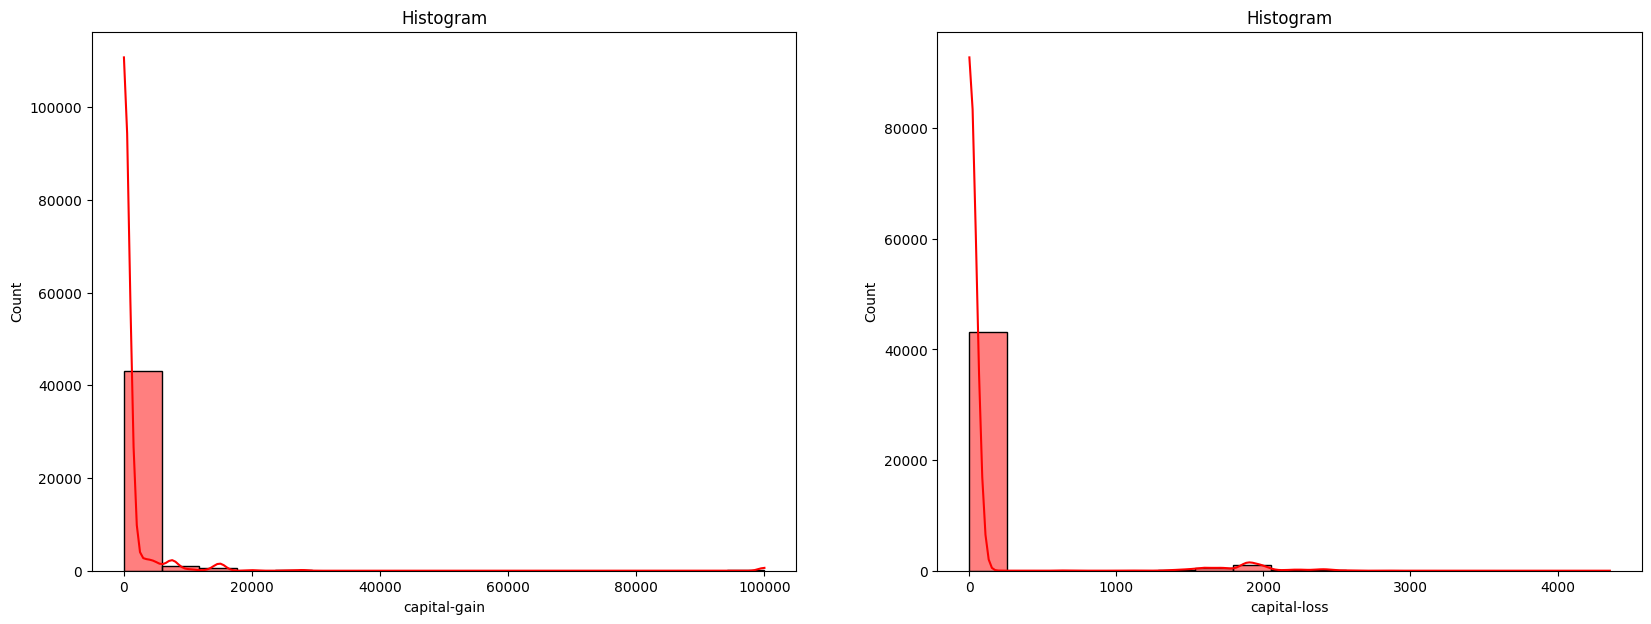

In [9]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.histplot(AI_df['capital-gain'], kde = True, color = 'r')
plt.title("Histogram")
plt.subplot(1,2,2)
sns.histplot(AI_df['capital-loss'], kde = True, color = 'r')
plt.title("Histogram")

In [10]:
AI_df.drop(['education', 'capital-gain', 'capital-loss'], axis = 1, inplace = True)

In [11]:
AI_df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [12]:
label_encoder = LabelEncoder()

AI_df['gender'] = label_encoder.fit_transform(AI_df['gender'])
AI_df['workclass'] = label_encoder.fit_transform(AI_df['workclass'])
AI_df['marital-status'] = label_encoder.fit_transform(AI_df['marital-status'])
AI_df['occupation'] = label_encoder.fit_transform(AI_df['occupation'])
AI_df['relationship'] = label_encoder.fit_transform(AI_df['relationship'])
AI_df['race'] = label_encoder.fit_transform(AI_df['race'])
AI_df['native-country'] = label_encoder.fit_transform(AI_df['native-country'])
AI_df['income'] = label_encoder.fit_transform(AI_df['income'])

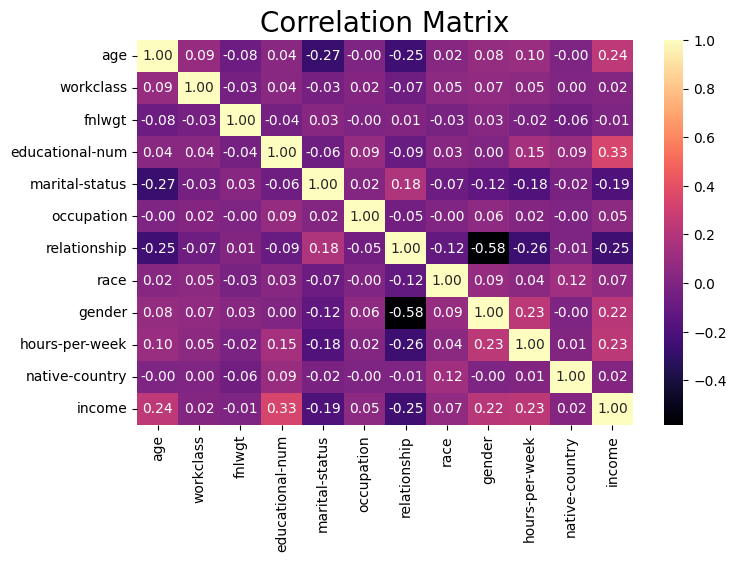

In [13]:
f, ax = plt.subplots(figsize=[8,5])
sns.heatmap(AI_df.corr(), annot=True, fmt=".2f", ax = ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

# Inputs Output Split

In [14]:
X = AI_df.drop(['income'], axis = 1)
y = AI_df['income']

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

# Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['age', 'fnlwgt', 'hours-per-week']

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

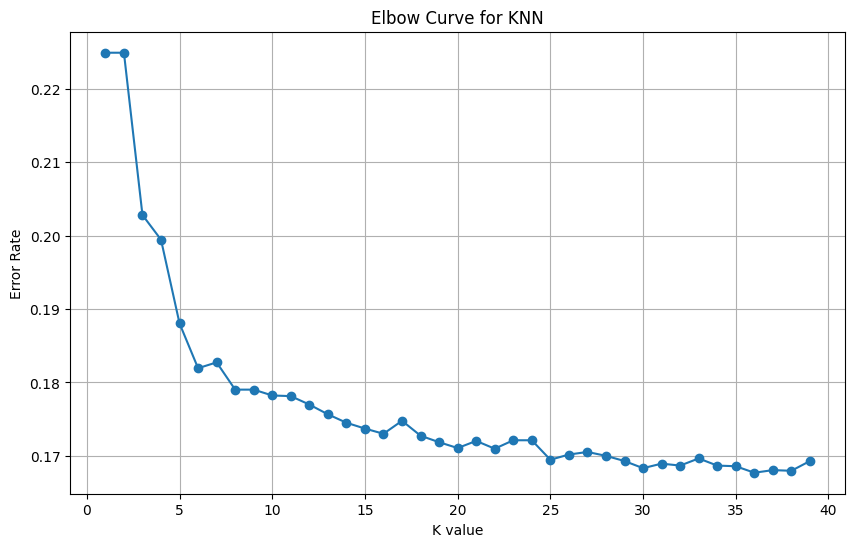

In [18]:
errors = []
k_range = range(1, 40)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    error = np.mean(y_pred != y_test)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8305

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8548
           1       0.67      0.59      0.63      2758

    accuracy                           0.83     11306
   macro avg       0.77      0.75      0.76     11306
weighted avg       0.82      0.83      0.83     11306

Confusion Matrix:
[[7759  789]
 [1127 1631]]
